In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
rock_features = pickle.load(open("datasets/rock_features", "rb"))
jazz_features = pickle.load(open("datasets/jazz_features", "rb"))
punk_features = pickle.load(open("datasets/punk_features", "rb"))
funk_features = pickle.load(open("datasets/funk_features", "rb"))

In [24]:
def normalize(data):
    min_max_scaler = MinMaxScaler()
    return pd.DataFrame(min_max_scaler.fit_transform(data), columns = data.columns)

def do_pca(data):
    pca = PCA(n_components = 2)
    return pca.fit_transform(data)

In [20]:
rock_norm = normalize(rock_features).as_matrix()
jazz_norm = normalize(jazz_features).as_matrix()
punk_norm = normalize(punk_features).as_matrix()
funk_norm = normalize(funk_features).as_matrix()

In [47]:
rockjazz = do_pca(np.vstack((rock_features, jazz_features)))
rock_pca = rockjazz[:len(rock_features)]
jazz_pca = rockjazz[len(rock_features):]

In [54]:
rockjazz_norm = do_pca(np.vstack((rock_norm, jazz_norm)))
rock_pca_norm = rockjazz_norm[:len(rock_norm)]
jazz_pca_norm = rockjazz_norm[len(rock_norm):]

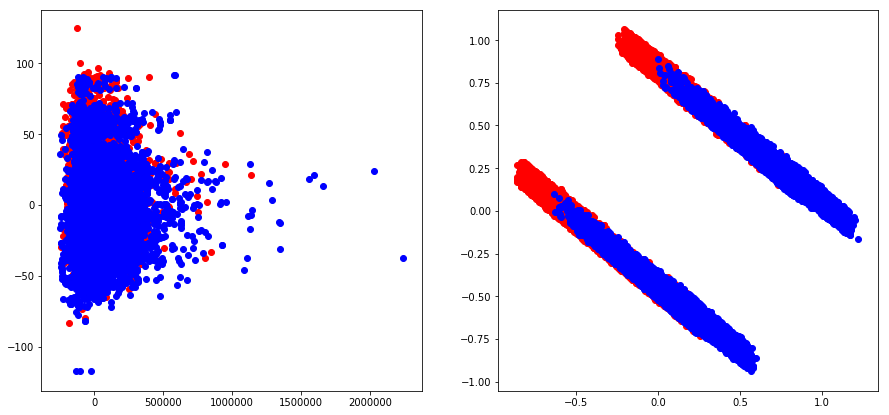

In [55]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.scatter(rock_pca[:,0], rock_pca[:,1], c='r')
plt.scatter(jazz_pca[:,0], jazz_pca[:,1], c='b')

plt.subplot(1, 2, 2)
plt.scatter(rock_pca_norm[:,0], rock_pca_norm[:,1], c='r')
plt.scatter(jazz_pca_norm[:,0], jazz_pca_norm[:,1], c='b')

plt.show()

In [18]:
rock_norm.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.743951,0.360483,0.818182,0.344613,1.0,0.018415,0.258811,0.000083,0.036538,0.735134,0.278422,0.188051,0.75
1,0.412367,0.842423,0.181818,0.775413,1.0,0.027158,0.002154,0.000000,0.123482,0.449330,0.670781,0.161155,0.75
2,0.875816,0.501688,1.000000,0.661200,1.0,0.017671,0.324269,0.000000,0.055870,0.775963,0.288114,0.138428,0.75
3,0.525029,0.468945,0.636364,0.693862,1.0,0.008557,0.091338,0.000000,0.381579,0.313233,0.178180,0.161388,0.75
4,0.600563,0.866980,0.454545,0.787074,1.0,0.274554,0.047834,0.000184,0.773279,0.606365,0.583620,0.125164,0.75
5,0.820766,0.794331,0.454545,0.623901,1.0,0.015811,0.077642,0.025860,0.325911,0.945561,0.544723,0.226397,0.75
6,0.414928,0.392203,0.000000,0.626116,0.0,0.051153,0.272909,0.000000,0.291498,0.203308,0.174676,0.230539,0.75
7,0.635130,0.935537,0.363636,0.644869,0.0,0.047991,0.000155,0.288843,0.148785,0.576005,0.385374,0.126444,0.75
8,0.462297,0.910979,0.545455,0.700955,1.0,0.045015,0.080663,0.152242,0.226721,0.628350,0.433978,0.231818,0.75
9,0.838689,0.455643,0.363636,0.705972,0.0,0.119048,0.006706,0.364964,0.263158,0.286013,0.428059,0.141531,0.75


In [19]:
rock_features.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.671,0.373,9.0,-18.064,1.0,0.0323,0.257000,0.000079,0.0481,0.732,92.717,295893.0,4.0
1,0.412,0.844,2.0,-5.613,1.0,0.0370,0.002140,0.000000,0.1340,0.459,174.452,258907.0,4.0
2,0.774,0.511,11.0,-8.914,1.0,0.0319,0.322000,0.000000,0.0672,0.771,94.736,227653.0,4.0
3,0.500,0.479,7.0,-7.970,1.0,0.0270,0.090700,0.000000,0.3890,0.329,71.835,259227.0,4.0
4,0.559,0.868,5.0,-5.276,1.0,0.1700,0.047500,0.000176,0.7760,0.609,156.295,209413.0,4.0
5,0.731,0.797,5.0,-9.992,1.0,0.0309,0.077100,0.024800,0.3340,0.933,148.192,348624.0,4.0
6,0.414,0.404,0.0,-9.928,0.0,0.0499,0.271000,0.000000,0.3000,0.224,71.105,354320.0,4.0
7,0.586,0.935,4.0,-9.386,0.0,0.0482,0.000155,0.277000,0.1590,0.580,114.997,211173.0,4.0
8,0.451,0.911,6.0,-7.765,1.0,0.0466,0.080100,0.146000,0.2360,0.630,125.122,356080.0,4.0
9,0.745,0.466,4.0,-7.620,0.0,0.0864,0.006660,0.350000,0.2720,0.303,123.889,231920.0,4.0
